# Ön Bilgi
**Geliştiren :** Onur Kantar - Ömer Resul Ertan

**Veri Kümesi Adı :** 17K Tweet

**Veri Kümesinin İçeriği :** 3 farklı sınıfa ait toplamda 17000 tweet.

**Tweet Sınıfları :** 

0. Nötr
1. Olumlu
2. Olumsuz

**Veri Kümesi Referansı :** “Duygudurum Analizinde Kelimeler, Anlamlar, Karakterler”,  Mehmet Fatih Amasyali, Hakan Taşköprü, Kübra Çalışkan, Akıllı Sistemlerde Yenilikler ve Uygulamaları Sempozyumu (ASYU), 4-6 Ekim 2018, Adana.

**Algoritma :** Recurrent Neural Network (RNN)

**Ağ Mimarisi :** 

- SimpleRNN(50)
- SimpleRNN(50)
- Dense(250)
- Dense(20)

**batch_size :** 8

**epochs :** 10

**Doğruluk Oranı :** ~%80


---



In [ ]:
import pandas as pd                     
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Sets/17000tweet/17000tweet.csv", sep=';', encoding="utf8")
df

,tweet,durum
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz
...,...,...
17284,@turktelekom kalite sıfır bi Turkcell değilsiniz,olumlu
17285,Turkcell ve Yandex Yerli Arama Motoru Üzerine ...,notr
17286,Turkcell yeni reklaminda altta kayan bilgilend...,notr
17287,Turkcell’de Yazılım Mühendisi maaşı hakkında b...,notr


# Veri Kümemizi Düzenleyelim : 

---



### NULL Değerleri Silelim : 

In [ ]:
df.isnull().sum()

tweet    0
durum    0
dtype: int64

In [ ]:
# NULL Değer Bulunmuyor.
# df = df.dropna().reset_index(drop=True)
# df.isnull().sum()

### Gereksiz Verileri Kaldıralım :  

In [ ]:
nltk.download('stopwords')
stop_word_list = stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [ ]:
def preprocess_text(sen):
    
    # URL Silme İşlemi
    sentence = re.sub(r'http\S+', '', str(sen))

    # E-Mail Adresi Silme İşlemi
    sentence = re.sub('\S+@\S+', '', str(sentence))

    # Sayıları Silme İşlemi
    sentence = re.sub('[\d\s]', ' ', str(sentence))

    # Noktalama İşaretlerini Silme İşlemi
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    
    # Tek Karakterleri Silme İşlemi
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    
    # Birden Çok Boşluğu Silme İşlemi
    sentence = re.sub(r'\s+', ' ', sentence)
        
    # Engellenecek Kelimeleri Silme İşlemi
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    
    # Tüm Harfler Küçük Harfe Dönüştürülüyor
    return single_doc.lower()

In [ ]:
x = df['tweet']
y = df['durum']

In [ ]:
x = x.apply(preprocess_text)
pd.DataFrame(x)

,tweet
0,ulan wifi ye bağlıyım ben ona bağlıyken turkce...
1,dk gb internet mb sadece kaşar turkcell düşer ...
2,ayrıca turkcell superonline reklamı kadar kötü...
3,turkcell pahalı
4,turkcell kaş ta internetin cekmiyor
...,...
17284,turktelekom kalite sıfır bi turkcell değilsiniz
17285,turkcell yandex yerli arama motoru üzerine çal...
17286,turkcell yeni reklaminda altta kayan bilgilend...
17287,turkcell yazılım mühendisi maaşı hakkında bilg...


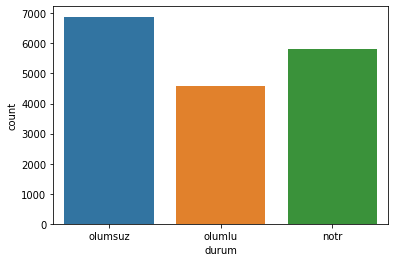

In [ ]:
sns.countplot(y)

# X Verilerimizi Düzenleyelim : 

---

## Vektörlere Dönüştürelim

Veri setimizin işlenebilmesi için text verileri numaralara çevirmemiz gerekir.


In [ ]:
token = Tokenizer()
# Her kelimenin sıklığını hesaplar
token.fit_on_texts(x)
# Tüm kelimeleri sayı dizisine dönüştürür
x = token.texts_to_sequences(x)
# Bütün metinlerimiz en uzun kelimeden oluşan metnimiz kadar sütundan oluşan (23) bir dizi ile temsil edilecek.
# 23'den kısa metinlerin boşlukları 0'lar ile doldurulacak.
x = pad_sequences(x)

In [ ]:
pd.DataFrame(x).sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
13768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,159,321,2642,2633,6039
3592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,122,570,19071,19072,414,1,912,6844,282,72,960,2894,7246,282,19073,223,1949,2062,19074
2848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2287,1,40,3605,1,289,17936,1698,4380
15410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1171,275,8,24,368,1,2530
3989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,49,143,1610,105,150,1366,10246,165,37,798,154,10347




## Ölçeklendirelim

**Verileri Ölçeklendirme Nedir?**

Ölçeklendirme dediğimiz şey veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmemize olanak sağlayan bir yöntemdir.

- Verilerinizin dağılımının ortalama değeri 0 ve standart sapma değeri 1 olacak şekilde değiştiriyoruz (Standartlaştırma).
- Tutarlılık oluşuyor. Bir veri diğer verilerden daha büyükse diğerleri üzerinde egemenlik kurabilir. Bunu istemeyiz.
- Bir öğrenme modeliyle çalışırken, özellikleri sıfır merkezli bir aralığa ölçeklemek önemlidir.
- Değerleri karşılaştırmak yerine oranları karşılaştırmış oluruz.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
pd.DataFrame(x).sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
1551,-0.010048,-0.011655,-0.01427,-0.016171,-0.012827,-0.017271,-0.016625,-0.016696,-0.013299,-0.012942,-0.015501,-0.013686,-0.015609,-0.022705,-0.039869,-0.06676,-0.091482,-0.129172,-0.173459,-0.208795,-0.246425,-0.286303,-0.319853,-0.347441,-0.389669,1.632477,-0.445354,-0.318591,-0.510514,-0.507910,1.215706,-0.472823,1.086542,-0.556514
2172,-0.010048,-0.011655,-0.01427,-0.016171,-0.012827,-0.017271,-0.016625,-0.016696,-0.013299,-0.012942,-0.015501,-0.013686,-0.015609,-0.022705,-0.039869,-0.06676,-0.091482,-0.128801,0.071252,0.159830,-0.243133,-0.119003,-0.078706,-0.345476,-0.203760,-0.230402,-0.428464,-0.475617,-0.418953,-0.311666,-0.410025,-0.498507,-0.302615,0.002420
6788,-0.010048,-0.011655,-0.01427,-0.016171,-0.012827,-0.017271,-0.016625,-0.016696,-0.013299,-0.012942,-0.015501,-0.013686,-0.015609,-0.022705,-0.039869,-0.06676,-0.091482,-0.129172,-0.173459,-0.208795,-0.246425,-0.286303,-0.319853,-0.347290,-0.182461,-0.305400,-0.443807,-0.306783,-0.404103,-0.523059,-0.504099,-0.174336,-0.607716,0.085357
7869,-0.010048,-0.011655,-0.01427,-0.016171,-0.012827,-0.017271,-0.016625,-0.016696,-0.013299,-0.012942,-0.015501,-0.013686,-0.015609,-0.022705,-0.039869,-0.06676,-0.091482,-0.129172,-0.173459,-0.208795,-0.246425,-0.286303,-0.319853,-0.347290,-0.384732,-0.214013,-0.392364,-0.477443,-0.507824,0.680857,-0.421179,2.042520,-0.603070,1.680475
12882,-0.010048,-0.011655,-0.01427,-0.016171,-0.012827,-0.017271,-0.016625,-0.016696,-0.013299,-0.012942,-0.015501,-0.013686,-0.015609,-0.022705,-0.039869,-0.06676,-0.091482,-0.129172,-0.173459,-0.208795,-0.246425,-0.286303,-0.319853,-0.347441,-0.389669,-0.424845,-0.445483,-0.485599,3.211884,3.184946,-0.552093,-0.544262,-0.574764,-0.587700


## RNN için x'i 3 Boyutlu Hale Getirelim

In [ ]:
print('x : ' + str(x.shape))

x : (17289, 34)


In [ ]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
print('x : ' + str(x.shape))

x : (17289, 34, 1)


# Y Verilerimizi Düzenleyelim :  


---

## One Hot Encoding Uygulayalım

**One Hot Encoding Nedir?**

One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. Hataları engeller ve daha hızlı çalışmasını sağlar. 

- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.

In [ ]:
pd.DataFrame(y).sample(5)

,durum
12074,notr
4438,olumsuz
1474,olumsuz
5578,olumlu
13746,olumsuz


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
7652,1
15598,1
8069,0
12739,1
12950,2


In [ ]:
y = to_categorical(y)
pd.DataFrame(y).sample(5)

,0,1,2
3065,0.0,0.0,1.0
15206,0.0,1.0,0.0
4087,0.0,0.0,1.0
7303,0.0,1.0,0.0
4304,0.0,0.0,1.0


# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

---


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (13831, 34, 1)
x Test : (3458, 34, 1)
y Train : (13831, 3)
y Test : (3458, 3)


# Katmanları Oluşturup Eğitime Başlayalım : 

In [ ]:
model = Sequential()

model.add(SimpleRNN(units = 50, activation = "relu", use_bias = True, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(SimpleRNN(units = 50, activation = "relu", use_bias = True))

model.add(Dense(250, activation = "relu"))

model.add(Dense(3, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 8, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Train on 13831 samples, validate on 3458 samples
Epoch 1/10
13831/13831 [==============================] - 22s 2ms/step - loss: 0.5888 - acc: 0.6931 - val_loss: 0.5446 - val_acc: 0.7244
Epoch 2/10
13831/13831 [==============================] - 22s 2ms/step - loss: 0.4937 - acc: 0.7504 - val_loss: 0.4544 - val_acc: 0.7659
Epoch 3/10
13831/13831 [==============================] - 22s 2ms/step - loss: 0.4476 - acc: 0.7761 - val_loss: 0.5031 - val_acc: 0.7600
Epoch 4/10
13831/13831 [==============================] - 21s 2ms/step - loss: 0.4304 - acc: 0.7849 - val_loss: 0.4728 - val_acc: 0.7634
Epoch 5/10
13831/13831 [==============================] - 22s 2ms/step - loss: 0.4211 - acc: 0.7877 - val_loss: 0.4155 - val_acc: 0.7933
Epoch 6/10
13831/13831 [==============================] - 21s 2ms/step - loss: 0.4077 - acc: 0.7941 - val_loss: 0.4314 - val_acc: 0.7877
Epoch 7/10
13831/13831 [==============================] - 21s 2ms/step - loss: 0.4038 - acc: 0.7954 - val_loss: 0.3934 - val_acc:

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [ ]:
print('Validation Loss :', score[0])
print('Validation Accuracy :', score[1])

Validation Loss : 0.3813340493610927
Validation Accuracy : 0.8066318035125732


# Sonuçları Değerlendirelim : 

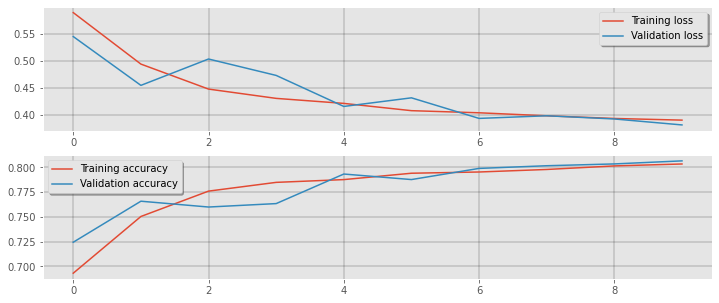

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2, 1, figsize=(12,5))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'], label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], label="Training accuracy")
ax[1].plot(history.history['val_acc'], label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)